<div >
<img src = "figs/ans_banner_1920x200.png" />
</div>

# Caso-taller:  PCA para estudiar la dimensionalidad de la calidad de vida en las ciudades 

En este caso-taller vamos a aplicar PCA en el estudio de calidad de vida en diferentes ciudades. Para ello, haremos uso de los datos que surgen del Almanaque Calificado de Lugares. En este Almanaque Boyer y Savageau calificaron 329 ciudades de acuerdo con los siguientes nueve criterios:

   - Clima y Terreno
   - Alojamiento
   - Cuidado de la salud y el medio ambiente
   - Crimen
   - Transporte
   - Educación
   - Artes
   - Recreación
   - Economía 


Con tantas variables disponibles, la matriz de dispersión puede resultar muy grande para estudiarla e interpretarla adecuadamente. Habría demasiadas correlaciones por pares entre las variables para considerar. Para interpretar los datos de una forma más significativa es necesario reducir el número de variables a unas pocas dimensiones, y para ello en este ejercicio recurriremos al análisis de componentes principales. 
 

## Instrucciones generales

1. Para desarrollar el *cuaderno* primero debe descargarlo junto al archivo de soporte.

2. Para responder cada inciso deberá utilizar el espacio debidamente especificado.

3. La actividad será calificada sólo si sube el *cuaderno* de jupyter notebook con extensión `.ipynb` en la actividad designada como "entrega calificada por el personal".

4. El archivo entregado debe poder ser ejecutado localmente por el tutor. Sea cuidadoso con la especificación de la ubicación de los archivos de soporte, guarde la carpeta de datos en la misma ruta de acceso del cuaderno, por ejemplo: `data/archivo_de_soporte.csv`.

## Desarrollo


### 1. Carga de datos

En la carpeta `data` se encuentra el archivo `lugares.csv` cargue estos datos en su *cuaderno*.

In [2]:
# Utilice este espacio para escribir el código.

#Cargamos las librerías a utilizar
import pandas as pd
import numpy as np


# Cargamos y visualizamos la primeras observaciones de los datos
lugares = pd.read_csv('lugares.csv')
lugares = lugares.set_index('Ciudad')
lugares.head()

,Clima y Terreno,Alojamiento,Cuidado de la salud y el medio ambiente,Crimen,Transporte,Educación,Artes,Recreación,Economía
Ciudad,,,,,,,,,
"Abilene,TX",521,6200,237,923,4031,2757,996,1405,7633
"Akron,OH",575,8138,1656,886,4883,2438,5564,2632,4350
"Albany,GA",468,7339,618,970,2531,2560,237,859,5250
"Albany-Schenectady-Troy,NY",476,7908,1431,610,6883,3399,4655,1617,5864
"Albuquerque,NM",659,8393,1853,1483,6558,3026,4496,2612,5727


(Utilice este espacio para describir su procedimiento)

1. Importar las librerías necesarias
2. Definir lugares mediante `pd.read_csv()` para leer el archivo CSV
3. Establecer el indice del dataframe a partir de la columna `Ciudad`
4. Mostar los primeros lugares del DataFrame

### 2.  Análisis descriptivo de las variables. 

Para el análisis descriptivo haga uso de estadísticas descriptivas y matrices de correlación. Indique además cuantas gráficas de dispersión bivariadas debería examinar con este número de variables. 

Explique porqué es importante conocer las estadísticas descriptivas y como contribuyen al ejercicio posterior de Análisis de Componentes Principales.
 
Tenga en cuenta que para las variables, a excepción de la alojamiento y crimen, cuanto mayor sea el puntaje, mejor. Por el contrario; para alojamiento y crimen, mientras más bajo sea el puntaje, mejor. También, mientras algunas comunidades podrían calificar mejor en las artes, otras podrían calificar mejor en otras áreas como tener una tasa de criminalidad más baja y buenas oportunidades educativas.

In [3]:
# Utilice este espacio para escribir el código.

# Estadísticas descriptivas
descriptive_stats = lugares.describe()
print(descriptive_stats)
print('-----------------------------------------------------------------------------------')

# Matriz de correlación
correlation_matrix = lugares.corr()
print(correlation_matrix)
print('-----------------------------------------------------------------------------------')

# Número de gráficas de dispersión bivariadas
num_variables = lugares.shape[1]
num_scatter_plots = (num_variables * (num_variables - 1)) // 2
print()
print(f'Número de gráficas de dispersión bivariadas: {num_scatter_plots}')

       Clima y Terreno   Alojamiento  Cuidado de la salud y el medio ambiente  \
count       329.000000    329.000000                               329.000000   
mean        538.732523   8346.559271                              1185.738602   
std         120.808259   2385.262622                              1003.002036   
min         105.000000   5159.000000                                43.000000   
25%         480.000000   6760.000000                               583.000000   
50%         542.000000   7877.000000                               833.000000   
75%         592.000000   9015.000000                              1445.000000   
max         910.000000  23640.000000                              7850.000000   

            Crimen   Transporte    Educación         Artes   Recreación  \
count   329.000000   329.000000   329.000000    329.000000   329.000000   
mean    961.054711  4210.082067  2814.887538   3150.884498  1845.957447   
std     357.154186  1451.179240   320.792953 

(Utilice este espacio para describir el procedimiento, análisis y conclusiones).

1. Generar e imprimir estadísticas descriptivas para el DataFrame `lugares`. La función `describe()` calcula métricas como la media, desviación estándar, valores mínimos, máximos y percentiles para cada columna del DataFrame.
2. Generar la matriz de correlación para el DataFrame lugares. Un valor cercano a 0 indica poca o ninguna correlación.
3. Calcular y mostrar el número total de gráficas de dispersión bivariadas posibles entre las variables. Esto se basa en la fórmula de combinaciones para elegir 2 variables de un total de `num_variables`.


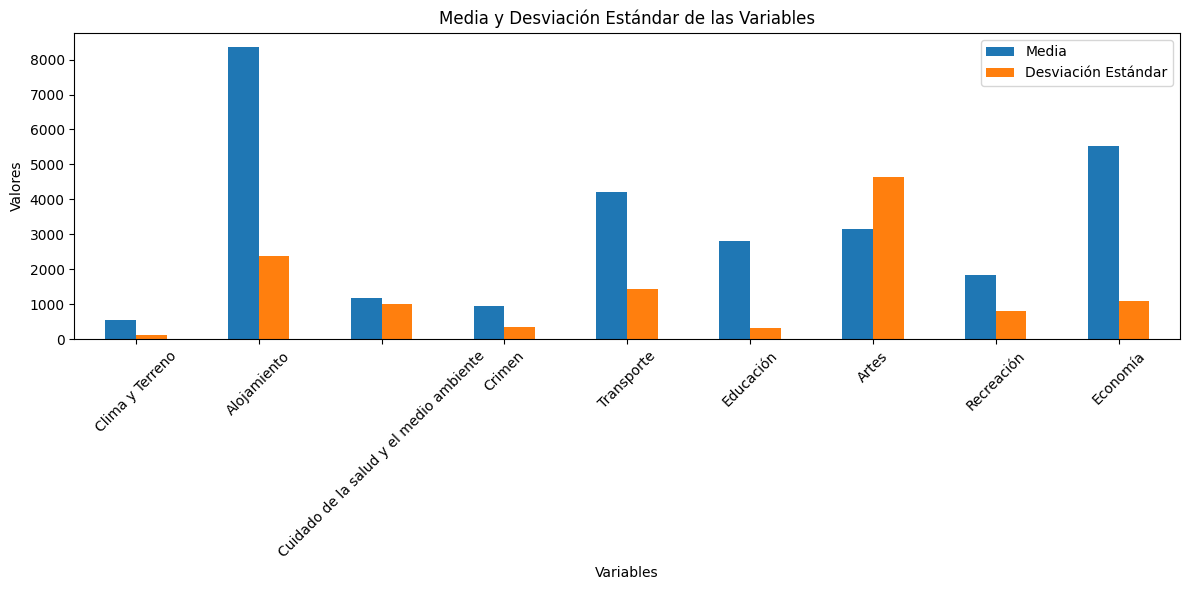

In [17]:
import matplotlib.pyplot as plt

stats_to_plot = descriptive_stats.loc[['mean', 'std']].T

stats_to_plot.plot(kind='bar', figsize=(12, 6))
plt.title('Media y Desviación Estándar de las Variables')
plt.xlabel('Variables')
plt.ylabel('Valores')
plt.xticks(rotation=45)
plt.legend(['Media', 'Desviación Estándar'])
plt.tight_layout()
plt.show()

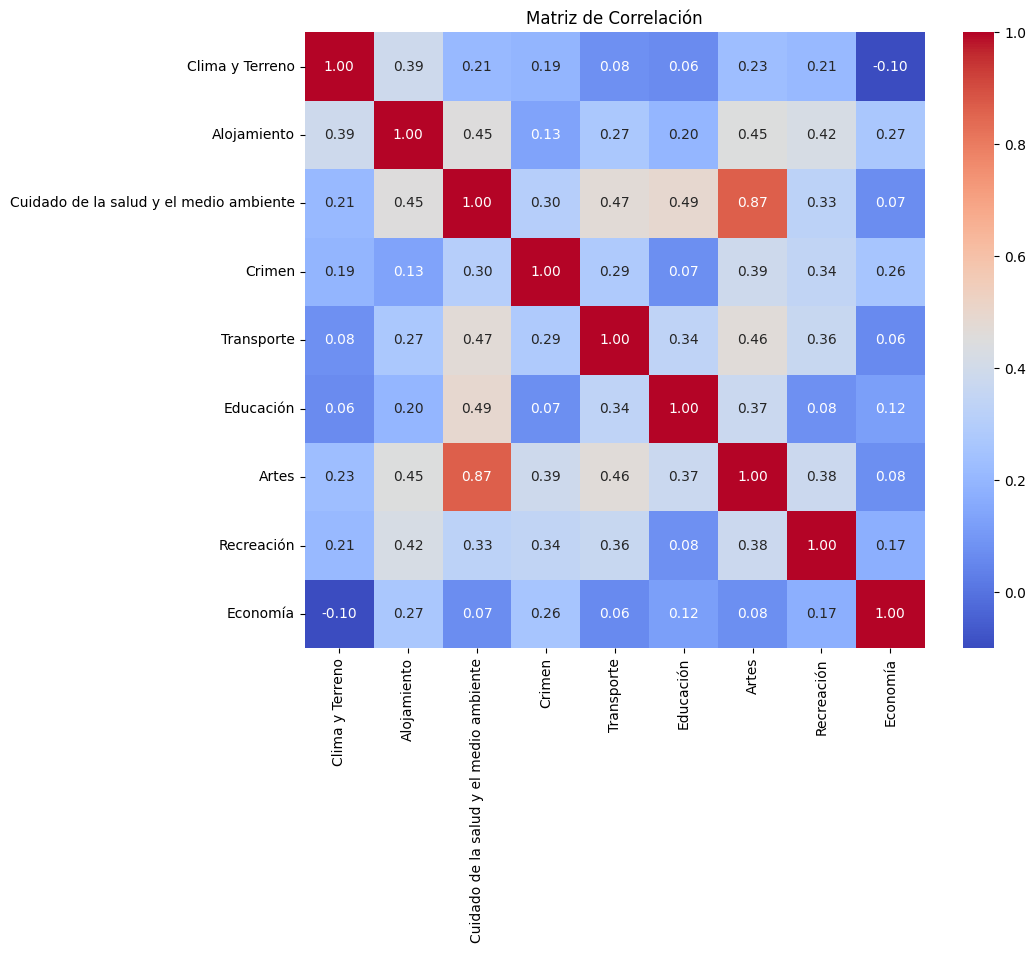

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Graficar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Matriz de Correlación")
plt.show()

### 3.  Cálculo y selección de componentes principales.

Utilizando Álgebra Lineal, calcule los eigen valores y los eigen vectores, a partir de ellos obtenga los Componentes Principales. Tenga en cuenta de estandarizar las variables y explicar por qué es importante no omitir este paso. 

Luego, examine los valores propios para determinar cuántos componentes principales se deben considerar. Explique el criterio que utilizó para la elección y justifique su respuesta.

In [5]:
# Utilice este espacio para escribir el código.

# Estandarizamos los datos
mu = lugares.mean()
sigma = lugares.std()
Z = (lugares - mu)/sigma
Z.head()

,Clima y Terreno,Alojamiento,Cuidado de la salud y el medio ambiente,Crimen,Transporte,Educación,Artes,Recreación,Economía
Ciudad,,,,,,,,,
"Abilene,TX",-0.146782,-0.899926,-0.945899,-0.106550,-0.123405,-0.180451,-0.464186,-0.545815,1.943473
"Akron,OH",0.300207,-0.087437,0.468854,-0.210147,0.463704,-1.174862,0.519812,0.972960,-1.083816
"Albany,GA",-0.585494,-0.422410,-0.566039,0.025046,-1.157047,-0.794555,-0.627683,-1.221651,-0.253917
"Albany-Schenectady-Troy,NY",-0.519273,-0.183862,0.244527,-0.982922,1.841894,1.820839,0.324003,-0.283402,0.312259
"Albuquerque,NM",0.995524,0.019470,0.665264,1.461400,1.617938,0.658096,0.289753,0.948204,0.185930


In [6]:
S = lugares.cov()
S

,Clima y Terreno,Alojamiento,Cuidado de la salud y el medio ambiente,Crimen,Transporte,Educación,Artes,Recreación,Economía
Clima y Terreno,14594.635555,1.113133e+05,2.584607e+04,8300.968947,1.387087e+04,2500.427144,1.272931e+05,2.083839e+04,-1.311212e+04
Alojamiento,111313.305536,5.689478e+06,1.083791e+06,114344.310772,9.412409e+05,151454.127113,4.967020e+06,8.137605e+05,6.969531e+05
Cuidado de la salud y el medio ambiente,25846.067064,1.083791e+06,1.006013e+06,109137.041784,6.845633e+05,157735.732708,4.031337e+06,2.636735e+05,7.534745e+04
Crimen,8300.968947,1.143443e+05,1.091370e+05,127559.112851,1.485321e+05,8526.061050,6.457665e+05,9.943876e+04,1.007018e+05
Transporte,13870.866530,9.412409e+05,6.845633e+05,148532.093057,2.105921e+06,156413.939136,3.131296e+06,4.275899e+05,9.324006e+04
Educación,2500.427144,1.514541e+05,1.577357e+05,8526.061050,1.564139e+05,102908.118411,5.558915e+05,2.016489e+04,4.164254e+04
Artes,127293.081817,4.967020e+06,4.031337e+06,645766.475851,3.131296e+06,555891.508312,2.155080e+07,1.420142e+06,3.809705e+05
Recreación,20838.387974,8.137605e+05,2.636735e+05,99438.764530,4.275899e+05,20164.885444,1.420142e+06,6.526833e+05,1.520352e+05
Economía,-13112.115557,6.969531e+05,7.534745e+04,100701.794008,9.324006e+04,41642.538096,3.809705e+05,1.520352e+05,1.176072e+06


In [7]:
S.shape

(9, 9)

In [8]:
eig_val, eig_vec = np.linalg.eig(S)
eig_val

array([2.44136687e+07, 4.40800485e+06, 1.63803960e+06, 1.07635578e+06,
       4.78338268e+05, 1.09626252e+04, 9.28099424e+04, 6.69959016e+04,
       2.40851797e+05])

In [9]:
eig_val_diag = np.diag(eig_val)
eig_val

array([2.44136687e+07, 4.40800485e+06, 1.63803960e+06, 1.07635578e+06,
       4.78338268e+05, 1.09626252e+04, 9.28099424e+04, 6.69959016e+04,
       2.40851797e+05])

In [10]:
eig_vec.dot(eig_val_diag).dot(eig_vec.T)

array([[ 1.45946356e+04,  1.11313306e+05,  2.58460671e+04,
         8.30096895e+03,  1.38708665e+04,  2.50042714e+03,
         1.27293082e+05,  2.08383880e+04, -1.31121156e+04],
       [ 1.11313306e+05,  5.68947778e+06,  1.08379089e+06,
         1.14344311e+05,  9.41240942e+05,  1.51454127e+05,
         4.96702042e+06,  8.13760454e+05,  6.96953131e+05],
       [ 2.58460671e+04,  1.08379089e+06,  1.00601308e+06,
         1.09137042e+05,  6.84563296e+05,  1.57735733e+05,
         4.03133688e+06,  2.63673538e+05,  7.53474523e+04],
       [ 8.30096895e+03,  1.14344311e+05,  1.09137042e+05,
         1.27559113e+05,  1.48532093e+05,  8.52606105e+03,
         6.45766476e+05,  9.94387645e+04,  1.00701794e+05],
       [ 1.38708665e+04,  9.41240942e+05,  6.84563296e+05,
         1.48532093e+05,  2.10592119e+06,  1.56413939e+05,
         3.13129553e+06,  4.27589875e+05,  9.32400645e+04],
       [ 2.50042714e+03,  1.51454127e+05,  1.57735733e+05,
         8.52606105e+03,  1.56413939e+05,  1.029081

In [11]:
eig_val/sum(eig_val)

array([7.52903473e-01, 1.35940329e-01, 5.05161974e-02, 3.31941921e-02,
       1.47516765e-02, 3.38081042e-04, 2.86220514e-03, 2.06611500e-03,
       7.42773060e-03])

(Utilice este espacio para describir el procedimiento, análisis, y conclusiones).

1. Estandarización de las variables. La estandarización se realizó utilizando la fórmula:  \[Z = \frac{X - \mu}{\sigma}\]  
    donde \(X\) es el valor original, *mu* es la media de la variable y *sigma* es la desviación estándar.

2. Se calculó la matriz de covarianza *S* de las variables estandarizadas.

3. A partir de la matriz de covarianza, se calcularon los valores propios *eig_val* y los vectores propios *eig_vec*.

4. Se calculó la proporción de varianza explicada por cada componente principal dividiendo cada valor propio entre la suma total de los valores propios.

5. Reconstrucción de la matriz original

### 4.  Interpretación de los componentes principales. 

Logró reducir la dimensión en el ejercicio anterior? Si lo hizo, los pesos obtenidos pueden identificar dimensiones menores de los datos? Dé una interpretación a estas dimensiones, para ello puede utilizar gráficas, tablas, etc.

Pesos de los Componentes Principales:
     Clima y Terreno  Alojamiento  Cuidado de la salud y el medio ambiente  \
PC1         0.006416    -0.015460                                -0.006692   
PC2         0.269142    -0.937207                                -0.082642   
PC3         0.178319     0.020540                                 0.027761   
PC4         0.028134     0.010902                                 0.037611   
PC5         0.149302    -0.018757                                 0.971532   

       Crimen  Transporte  Educación     Artes  Recreación  Economía  
PC1  0.026311   -0.016278   0.995145 -0.081408   -0.042138 -0.001187  
PC2  0.177751    0.083842  -0.022933 -0.026688   -0.012118 -0.048638  
PC3  0.026562    0.159076   0.001372 -0.137061    0.241360  0.929493  
PC4 -0.099035   -0.116014  -0.087689 -0.944780   -0.266827 -0.053976  
PC5  0.038397    0.146650   0.009419  0.013545    0.041508 -0.092235  


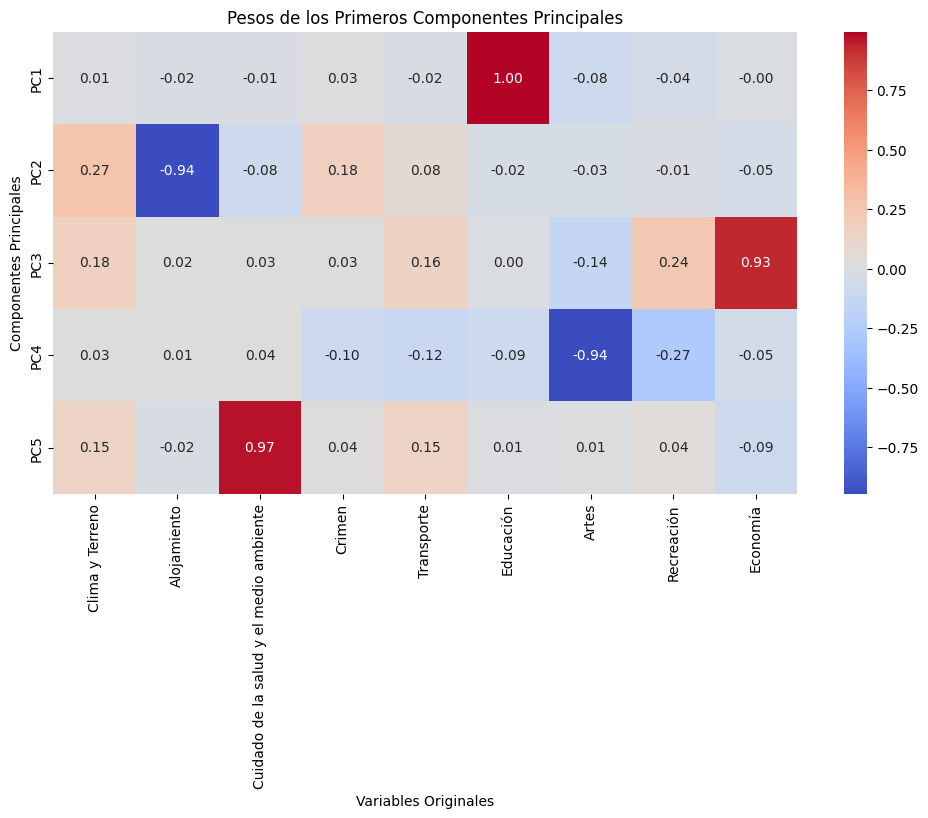

In [23]:
# Utilice este espacio para escribir el código.

# Crear un DataFrame para los pesos de los componentes principales
componentes_principales = pd.DataFrame(eig_vec, columns=lugares.columns, index=[f'PC{i+1}' for i in range(len(eig_val))])

print("Pesos de los Componentes Principales:")
print(componentes_principales.head())


plt.figure(figsize=(12, 6))
sns.heatmap(componentes_principales.iloc[:5], annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Pesos de los Primeros Componentes Principales")
plt.xlabel("Variables Originales")
plt.ylabel("Componentes Principales")
plt.show()

(Utilice este espacio para describir el procedimiento, análisis, y conclusiones).

### 5.   Detección de ciudades inusuales.

A partir de los Componentes Principales identifique las 5 ciudades calidad de vida inusualmente alta. En la distribución de calidad de vida  de la muestra que tan inusuales son? Cuáles son las dimensiones que hacen que estas ciudades tengan esta calidad de vida inusual?

In [22]:
# Utilice este espacio para escribir el código.

#  Proyectar los datos estandarizados en los componentes principales
scores = Z.dot(componentes_principales.T)

# Ordenar las ciudades por las puntuaciones en el primer componente principal (PC1)
scores['PC1'] = scores.iloc[:, 0]
top_cities = scores['PC1'].nlargest(5)

print("Top 5 ciudades con calidad de vida inusualmente alta:")
print(top_cities)

# Analizar las dimensiones que contribuyen a estas puntuaciones
dimensions = componentes_principales.loc['PC1']
print("\nContribución de las dimensiones al PC1:")
print(dimensions)

Top 5 ciudades con calidad de vida inusualmente alta:
Ciudad
Philadelphia,PA-NJ    2.709163
Hartford,CT           2.475537
Bergen-Passaic,NJ     2.438579
Rochester,NY          2.246981
Springfield,MA        2.212155
Name: PC1, dtype: float64

Contribución de las dimensiones al PC1:
Clima y Terreno                            0.006416
Alojamiento                               -0.015460
Cuidado de la salud y el medio ambiente   -0.006692
Crimen                                     0.026311
Transporte                                -0.016278
Educación                                  0.995145
Artes                                     -0.081408
Recreación                                -0.042138
Economía                                  -0.001187
Name: PC1, dtype: float64


(Utilice este espacio para describir el procedimiento, análisis, y conclusiones).